In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


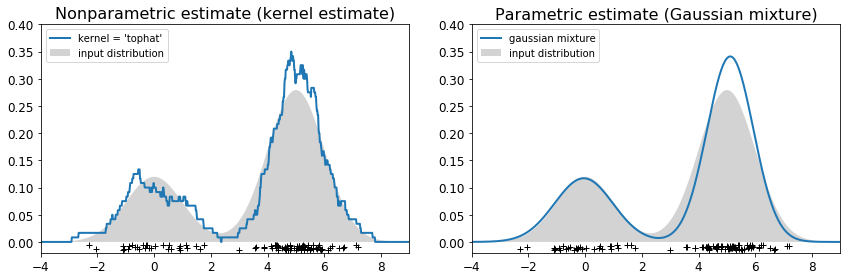

In [11]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, (ax_left, ax_right) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax_left.fill(X_plot[:, 0], true_dens, fc='lightgray',
        label='input distribution')

for kernel in ['tophat']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.6).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax_left.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel),
                linewidth=2)

ax_left.legend(loc='upper left')
ax_left.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax_left.set_xlim(-4, 9)
ax_left.set_ylim(-0.02, 0.4)
ax_left.set_title('Nonparametric estimate (kernel estimate)', fontsize=16)
for tick in ax_left.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax_left.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

    

gmm = GaussianMixture(n_components=2, covariance_type='full', max_iter=20, random_state=0)
gmm_model = gmm.fit(X)

ax_right.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax_right.fill(X_plot[:, 0], true_dens, fc='lightgray',
              label='input distribution')

gmm_dens = np.exp(gmm_model.score_samples(X_plot))
ax_right.plot(X_plot[:, 0], gmm_dens, '-',
        label="gaussian mixture", linewidth=2)

ax_right.legend(loc='upper left')
ax_right.set_xlim(-4, 9)
ax_right.set_ylim(-0.02, 0.4)
ax_right.set_title('Parametric estimate (Gaussian mixture)', fontsize=16)
for tick in ax_right.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax_right.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)


plt.tight_layout()

plt.savefig('param_vs_nonparam_density_estimates.eps')

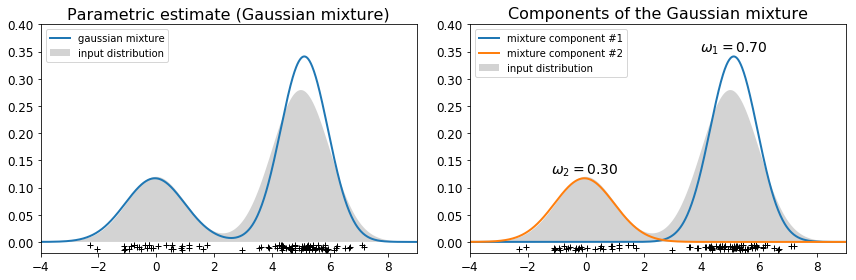

In [41]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))




fig, (ax_left, ax_right) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
gmm = GaussianMixture(n_components=2, covariance_type='full', max_iter=20, random_state=0)
gmm_model = gmm.fit(X)

ax_left.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax_left.fill(X_plot[:, 0], true_dens, fc='lightgray',
              label='input distribution')

gmm_dens = np.exp(gmm_model.score_samples(X_plot))
ax_left.plot(X_plot[:, 0], gmm_dens, '-',
        label="gaussian mixture", linewidth=2)

ax_left.legend(loc='upper left')
ax_left.set_xlim(-4, 9)
ax_left.set_ylim(-0.02, 0.4)
ax_left.set_title('Parametric estimate (Gaussian mixture)', fontsize=16)
for tick in ax_left.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax_left.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)



    

ax_right.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax_right.fill(X_plot[:, 0], true_dens, fc='lightgray',
              label='input distribution')

for i in xrange(2):
    gm = norm(loc=gmm.means_[i], scale=np.sqrt(gmm.covariances_[i]))
    gm_dens = gmm.weights_[i] * gm.pdf(X_plot[:, 0])[0]
    ax_right.plot(X_plot[:, 0], gm_dens, 
                  label="mixture component #{}".format(i+1), linewidth=2)
    ax_right.text(gmm.means_[i], np.max(gm_dens), 
                  '$\omega_{0} = {1:.2f}$'.format(i + 1, gmm.weights_[i]),
                 fontsize=14, ha='center', va='bottom')

ax_right.legend(loc='upper left')
ax_right.set_xlim(-4, 9)
ax_right.set_ylim(-0.02, 0.4)
ax_right.set_title('Components of the Gaussian mixture', fontsize=16)
for tick in ax_right.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax_right.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

plt.tight_layout()

plt.savefig('gmm_splitting_gaussians.eps')